In [3]:
# Using n = 30
import sys
import warnings
sys.path.append("/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend")
warnings.filterwarnings('ignore')
from stats import * 
from similar_plays import * 
import pandas as pd

import os 
os.chdir("/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend")





In [34]:
df_full = pd.read_csv("data/plays.csv", index_col=0)

In [ ]:
sample_sizes = [5000, 10000, 50000, 100000, 200000, 500000, 700000, 800000, 872000]

for i in sample_sizes: 
    df = df_full.sample(sample_sizes)
    sample = df.sample(1)
    defensive_team = sample["defteam"].values[0]
    offensive_team = sample["home_team"].values[0] if sample["home_team"].values[0] != defensive_team else sample["away_team"].values[0]
    similar_df, similar_df_specified, similar_df_defensive = produce_dataframes(df, offensive_team, defensive_team, sample.iloc[0])
    recommendation = recommend_play(similar_df, sample.iloc[0])
    return_gower_values(similar_df, similar_df_specified, similar_df_defensive)
    notify_danger(similar_df_defensive)

In [48]:

import sys
import warnings
sys.path.append("/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend")
warnings.filterwarnings('ignore')
from stats import * 
from similar_plays import * 
import pandas as pd

import os 
os.chdir("/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend")


import time

df_full = pd.read_csv("data/plays.csv", index_col=0)

sample_sizes = [50000, 75000, 100000, 125000, 150000, 175000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000, 872000]

results = {size: [] for size in sample_sizes}

for size in sample_sizes:
    print(f"Running for {size}")
    for _ in range(10):  
        start_time = time.time()

        df = df_full.sample(size)
        sample = df.sample(1)
        defensive_team = sample["defteam"].values[0]
        offensive_team = sample["home_team"].values[0] if sample["home_team"].values[0] != defensive_team else sample["away_team"].values[0]
        
        similar_df, similar_df_specified, similar_df_defensive = produce_dataframes(df, offensive_team, defensive_team, sample.iloc[0])
        recommendation = recommend_play(similar_df, sample.iloc[0])
        return_gower_values(similar_df, similar_df_specified, similar_df_defensive)
        notify_danger(similar_df_defensive)

        end_time = time.time()
        elapsed_time = end_time - start_time
        results[size].append(elapsed_time)


import json

json = json.dumps(results)

f = open("latency_full.json","w")
f.write(json)
f.close()


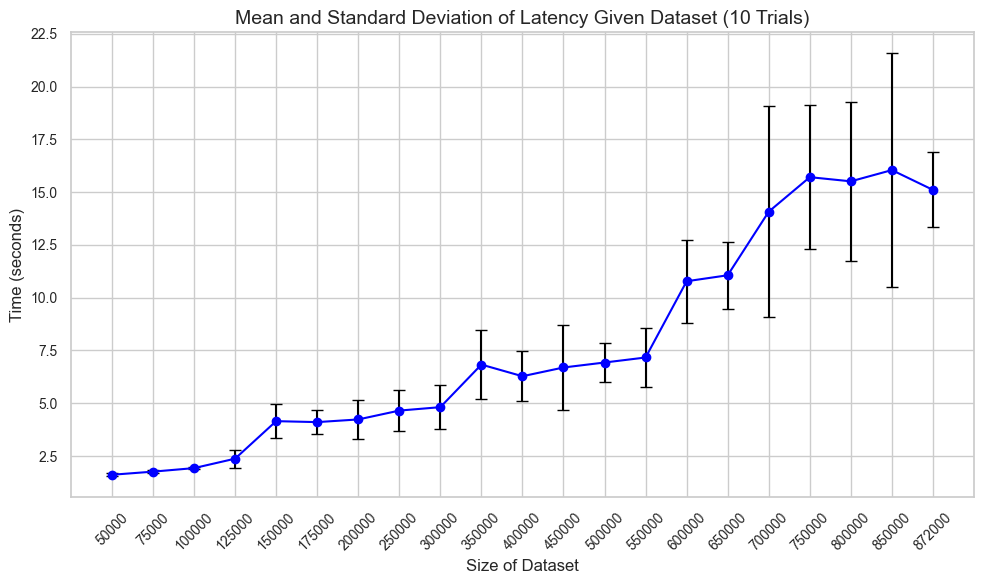

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

with open('latency_full.json', 'r') as f:
    results = json.load(f)

df = pd.DataFrame(results)
means = df.mean()
std_devs = df.std()
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.errorbar(x=means.index, y=means, yerr=std_devs, fmt='-o', capsize=4, ecolor='black', linestyle='-', marker='o', color='blue')
plt.xlabel("Size of Dataset", fontsize=12)
plt.ylabel("Time (seconds)", fontsize=12)
plt.title("Mean and Standard Deviation of Latency Given Dataset (10 Trials)", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
